Aluno : Daniel Anselmo Nascimento de Souza

# Algoritmo Page Rank

## Contexto

O PageRank foi concebido para medir a importância de páginas na Web, levando em conta a estrutura de links entre elas.

A ideia central é que, se muitas páginas importantes apontam para uma determinada página, então esta página também deve ser considerada importante. Ou seja, não basta contar quantos links uma página recebe; é necessário considerar o “peso” (importância) de quem está apontando para ela. Esse processo é autorreferencial: o PageRank de uma página depende do PageRank das páginas que a linkam.

## Abordagem do Page Rank via Random Surfer Model

O PageRank pode ser interpretado através do comportamento de um “navegador aleatório” (chamado Randy no exemplo). Esse navegador segue duas estratégias:

- Estratégia 1 (seguir links):
Quando o usuário (Randy) está em uma página, ele analisa todos os links de saída dessa página e escolhe um deles aleatoriamente para clicar. Por exemplo, se a página atual tiver 5 links de saída, a probabilidade de escolher qualquer um desses links será 1/5.

- Estratégia 2 (teletransporte):
Em alguns casos, o navegador decide “pular” para uma página escolhida ao acaso dentre todas as páginas da Web, independentemente da página atual ou dos links nela contidos.

Na prática, Randy atua 90% do tempo usando a Estratégia 1 (seguir links) e 10% do tempo usando a Estratégia 2 (teletransporte). Caso uma página não tenha links de saída, Randy obrigatoriamente recorre à Estratégia 2 para não ficar preso.

### Modelagem com Cadeias de Markov



Para aplicar o PageRank, modelamos o problema como uma cadeia de Markov, em que:

- Estados: Cada página da Web é um estado do modelo Markoviano.

- Transições: A probabilidade de transitar de uma página (estado atual) para outra (estado futuro) é dada pelas estratégias de Randy.

Teremos então uma matriz de transição, $M$, em que cada entrada $M_{ij}$ representa a probabilidade de ir da página $j$ para a página $i$. Note que a convenção aqui é usar colunas para representar a origem e linhas para o destino, o que é comum em muitas formulações do PageRank (a coluna $j$ da matriz mostra como a probabilidade flui da página $j$ para as outras páginas).

#### Construindo as matrizes de transição:


**Matriz $M_1$ (Estratégia 1)**

A matriz de transição $M_1$ (de dimensão $n \times n$) representa a probabilidade de, partindo da página $j$, chegar à página $i$ seguindo apenas links:

$$
(M_1)_{ij} =
\begin{cases}
\frac{1}{N_j}, & \text{se há um link da página } j \text{ para a página } i, \\[6pt]
\frac{1}{n}, & \text{se a página } j \text{ não tem links de saída}, \\[6pt]
0, & \text{caso contrário}.
\end{cases}
$$

Aqui, $N_j$ é o número de links de saída da página $j$. Se uma página não tem links, distribuímos a probabilidade de forma uniforme por todas as páginas, garantindo que a coluna da matriz $M_1$ referente a ela seja uma distribuição de probabilidade.


**Matriz $M_2$ (Estratégia 2)**

A matriz de teletransporte $M_2$ é bem mais simples: a probabilidade de saltar para qualquer página é sempre uniforme e independe do estado anterior. Assim:

$$ M_2 = \frac{1}{n} J,$$

onde $J$ é uma matriz $n \times n$ cujas entradas são todas $1$. Isso implica que, não importa de qual página partimos, a distribuição de destino é $(\frac{1}{n}, \frac{1}{n}, \dots, \frac{1}{n})$.

**A Matriz de Transição $M$ do PageRank**

O comportamento de Randy é um misto das duas estratégias. Com probabilidade $(1-\alpha)$ ele segue a matriz $M_1$ e com probabilidade $\alpha$ ele segue $M_2$. Assim, a matriz final $M$ é dada por:

$$
M = (1-\alpha)M_1 + \alpha M_2.
$$

No caso clássico, $\alpha = 0,1$, logo:

$$M = \frac{9}{10} M_1 + \frac{1}{10} M_2.
$$

### Distribuição Estacionária (PageRank)

O PageRank de cada página é encontrado através da distribuição estacionária da cadeia de Markov descrita por $M$. A distribuição estacionária $\mathbf{p}_\infty$ é dada por:


$$
M \mathbf{p}_\infty = \mathbf{p}_\infty.
$$

Esse problema pode ser visto como um problema de autovalor e autovetor. O vetor $\mathbf{p}_\infty$ é o autovetor associado ao autovalor $1$ da matriz $M$


### Métodos de Cálculo do PageRank

Para encontrar $\mathbf{p}_\infty$, podemos:

- Resolver o sistema $(M - 1*I)\mathbf{\mathbf{p}_{\infty}} = 0$:  
  Encontramos o autovetor associado ao autovalor $1$.
    
- Iteração de Potência:  
  Começamos com um vetor inicial $\mathbf{p}^{(0)} \neq 0$ e aplicamos $M$ repetidamente:

  $$ \mathbf{p}^{(k+1)} = \frac{M \mathbf{p}^{(k)}}{||M \mathbf{p}^{(k)}||_{1}}. $$
    
  À medida que $k \to \infty$, $\mathbf{p}^{(k)}$ converge para $\mathbf{p}_\infty$.

O segundo método é mais escalável para a Web real, com bilhões de páginas.

### Iteração de Potências

Como iremos além do exemplo do livro abaixo, usar o algoritmo de pagerank na prática para ilustrar sua funcionalidade, iremos agora fazer a análise do método de potências para uma Matriz $M$, sendo $M$ matriz de Markov

**Teorema**: Se M é uma matriz de markov, então seu maior autovalor é $\lambda_1 = 1$

**Demonstração**:

Como $M$ é uma matriz de Markov => $M$ tem colunas que somam 1. Dessa forma, a matriz $M-I$ tem colunas que somam 0. Então se somarmos as linhas da matriz $M-I$ isso nos dá o vetor 0.

Dessa forma existe uma combinação linear das linhas da matriz $M-I$, com coeficientes diferente de 0, que produz o vetor 0. Então temos que det(M-I) = 0, logo 1 é autovalor de M.

Agora que sabemos que 1 é autovalor, iremos provar que ele é o maior autovalor de $M$.

Seja $$ M = \begin{bmatrix}
    a_{11} & a_{12} & a_{13} & \cdots & a_{1n} \\
    a_{21} & a_{22} & a_{23} & \cdots & a_{2n} \\
    a_{31} & a_{32} & a_{33} & \cdots & a_{3n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    a_{n1} & a_{n2} & a_{n3} & \cdots & a_{nn}
\end{bmatrix} $$

<br>

$$ Mu = \begin{bmatrix}
    a_{11}u_1 + a_{12}u_2 + a_{13}u_3 + \cdots + a_{1n}u_n \\
    a_{21}u_1 + a_{22}u_2 + a_{23}u_3 + \cdots + a_{2n}u_n \\
    a_{31}u_1 + a_{32}u_2 + a_{33}u_3 + \cdots + a_{3n}u_n \\
    \vdots  \\
    a_{n1}u_1 + a_{n2}u_2 + a_{n3}u_3 + \cdots + a_{nn}u_n
\end{bmatrix} $$

(Aqui iremos usar $||.||_{1}$ para representar a norma 1)

Seja $ u \in R^{n} $, com $ u \neq \vec{0}$

<br>

\begin{align}
||Mu||_{1} &= \sum_{i=1}^{n} |a_{i1}u_{1} +...+ a_{in}u_{n}| \\
           &\leq \sum_{i=1}^{n} |a_{i1}u_{1}| + ... + |a_{in}u_{n}|  \\
           &=  |u_1|\cdot(|a_{11}| + ... + |a_{n1}|) + ... + |u_n|\cdot(|a_{1n}| + ... +|a_{nn}|) \\
           &= |u_1| + ... + |u_n| \\
           &= ||u||_{1}
\end{align}

Dessa forma, temos: $$ ||Mu||_{1} = ||\lambda u||_{1} = |\lambda| ||u||_{1} \leq ||u||_{1} $$

Portanto temos o resultado desejado: $$ \lambda \leq 1 $$

#### Prova da convergência do método para uma matriz $M$ markoviana

**Teorema**: Seja $u_1, u_2, ..., u_n$ uma base de autovetores de uma matriz markoviana $M \in \mathbb{R}^{n \:\text{x}\: n}$, onde cada $u_i$ está associado a autovalores $\lambda_i$, com $ |\lambda_1| \geq |\lambda_2 \geq ... \geq |\lambda_n| $. Suponha que $p_0$ está no subespaço gerado pelos autovetores, ou seja,

$$ p_0 = c_1u_1 + ... + c_nu_n  $$

com $c_1 \neq 0$. Então, $p_k = A^kp_0$ converge para um múltiplo do autovetor dominante, $u_1$.

**Demonstração**:

Seja $$ p0 = c_1u_1 +...+c_nu_n $$

Se multiplicarmos ambos os lados por $ M^{k} $, temos:

\begin{align}
M^kp_0 &= M^kc_1u_1 + ... + M^kc_nu_n \\
       &= c_1u_1 + ... + \lambda_n^kc_nv_n
\end{align}

Note que:

\begin{align}
|\lambda_2^kc_2u_2 + ... + \lambda_m^kc_nu_n| &\leq |\lambda_2|^k . |c_2u_2| + ... + |\lambda_n|^k . |c_nu_n| \\
\end{align}

<br>

Todos os termos $|c_ju_j| $, com $ j \geq 2 $ são constantes e são multiplicados por $|\lambda_j|^k$.

Para $j \geq 2 $ os termos $|\lambda_j|^k \longrightarrow 0$ quando $k\longrightarrow \infty$

Dessa forma, temos que:

$$
\lim_{k \to \infty} M^kp_0 = c_1u_1,
$$

logo $p_k$ converge para um múltiplo do autovetor dominante, concluindo a demonstração.

### Exemplo do livro - Web Simplificada

No exemplo do livro, temos uma micro-web que é dada pelo grafo abaixo:

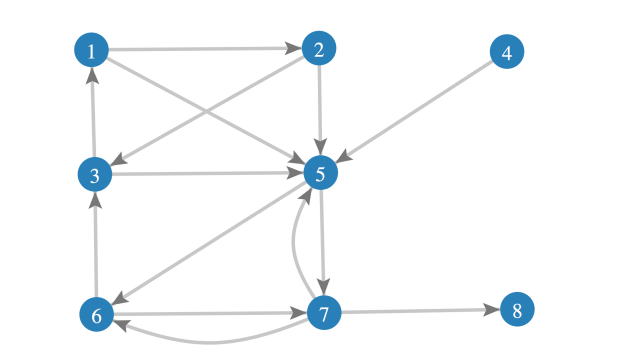

#### Modelagem das Matrizes de Markov


Estratégia 1 (Seguir Links):

$$
M_1 = \begin{bmatrix}
0 & 0 & \frac{1}{2} & 0 & 0 & 0 & 0 & \frac{1}{8} \\
\frac{1}{2} & 0 & 0 & 0 & 0 & 0 & 0 & \frac{1}{8} \\
0 & \frac{1}{2} & 0 & 0 & 0 & \frac{1}{2} & 0 & \frac{1}{8} \\
0 & 0 & 0 & 0 & \frac{1}{2} & 0 & 0 & \frac{1}{8} \\
\frac{1}{2} & \frac{1}{2} & \frac{1}{2} & 1 & 0 & 0 & \frac{1}{2} & \frac{1}{8} \\
0 & 0 & 0 & 0 & \frac{1}{2} & 0 & \frac{1}{3} & \frac{1}{8} \\
0 & 0 & 0 & 0 & \frac{1}{2} & \frac{1}{2} & 0 & \frac{1}{8} \\
0 & 0 & 0 & 0 & 0 & 0 & \frac{1}{3} & \frac{1}{8}
\end{bmatrix}
$$

Estratégia 2 (Teletransporte):


$$
M_2 = \frac{1}{8} \mathbf{J}_n =
\begin{bmatrix}
\frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} \\
\frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} \\
\frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} \\
\frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} \\
\frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} \\
\frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} \\
\frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} \\
\frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} & \frac{1}{8} \\
\end{bmatrix}
$$

Combinação das Estratégias

$$
M = (1 - \alpha)M_1 + \frac{\alpha}{8} \mathbf{J}
$$

$$
 = \frac{9}{10} M_1 + \frac{1}{80}\mathbf{J},
$$

#### Achando a distribuição Estacionária $\mathbf{p}_\infty$

In [ ]:
import numpy as np

# Definindo a matriz M do micro-Web conforme o exemplo do livro.

# Matriz M_1
M_1 = np.array([
[  0,   0, 1/2, 0,   0,   0,   0, 1/8],
[1/2,   0,   0, 0,   0,   0,   0, 1/8],
[  0, 1/2,   0, 0,   0, 1/2,   0, 1/8],
[  0,   0,   0, 0,   0,   0,   0, 1/8],
[1/2, 1/2, 1/2, 1,   0,   0, 1/3, 1/8],
[  0,   0,   0, 0, 1/2,   0, 1/3, 1/8],
[  0,   0,   0, 0, 1/2, 1/2,   0, 1/8],
[  0,   0,   0, 0,   0,   0, 1/3, 1/8]])

# Número de páginas
n = M_1.shape[0]

# Matriz M_2
M_2 = np.ones((n,n))/n

M = 9/10 *M_1 + 1/10 *M_2

# Inicializa a distribuição com probabilidades uniformes
p0 = np.ones(n)/n

def power_iteration(M, p, tol):
  #Valor grande para entrar no while
  diff = 1000

  while diff > tol:
    p_new = (M @ p)/np.linalg.norm(M @ p, 1)  # Atualiza a distribuição
    diff = np.linalg.norm(p_new - p, 1)  # Norma L1 da diferença
    p = p_new

  return p

p_inf = power_iteration(M, p0, 1e-12)

# p agora é a distribuição estacionária aproximada (PageRank)
print("PageRank aproximado:")
for i, val in enumerate(p_inf, start=1):
    print(f"Página {i}: {val:.5f}")

print(" ")
# Podemos checar se a soma é 1 (ou próximo a 1 devido a arredondamentos)
print("Soma das probabilidades:", np.sum(p_inf))

PageRank aproximado:
Página 1: 0.08152
Página 2: 0.05868
Página 3: 0.13229
Página 4: 0.02199
Página 5: 0.22678
Página 6: 0.18643
Página 7: 0.20794
Página 8: 0.08437
 
Soma das probabilidades: 1.0


In [ ]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin, urlparse
import numpy as np

In [ ]:
def get_links_from_url(url, domain_filter=None):
    """Retorna uma lista de links (URLs completas) encontrados na página 'url'
    que estejam no mesmo domínio (se domain_filter for especificado)."""
    links = set()
    try:
        response = requests.get(url, timeout=5)
        if response.status_code != 200:
            return list(links)
        html = response.text
        soup = BeautifulSoup(html, 'html.parser')

        for a_tag in soup.find_all('a', href=True):
            href = a_tag['href'].strip()
            # Converte link relativo em absoluto
            full_url = urljoin(url, href)
            parsed_url = urlparse(full_url)

            # Filtro de domínio
            if domain_filter and domain_filter not in parsed_url.netloc:
                continue

            # Filtra tipos de arquivos não HTML
            if any(full_url.lower().endswith(ext) for ext in ['.pdf','.jpg','.jpeg','.png','.gif','.zip','.rar','.doc','.docx','.xls','.xlsx']):
                continue

            # Remove ancoragem interna
            full_url = full_url.split('#')[0]

            # Adiciona somente URLs iniciando com http
            if full_url.startswith('http') and full_url != url:
                links.add(full_url)

    except Exception:
        # Em caso de erro (timeout, conexão falhou, etc.), retornar vazio
        pass

    return list(links)

In [ ]:
# Função cacheada para não repetir crawling da mesma página
crawled_cache = {}
def get_links_cached(url, domain_filter=None):
    if url in crawled_cache:
        return crawled_cache[url]
    found_links = get_links_from_url(url, domain_filter=domain_filter)
    crawled_cache[url] = found_links
    return found_links

In [ ]:
# Parâmetros
root_url = "https://ge.globo.com/"
parsed_root = urlparse(root_url)
domain = parsed_root.netloc

In [ ]:
# Limites
max_level_1 = 500  # Máximo de links do primeiro nível
max_level_2 = 50  # Máximo de links do segundo nível por link do primeiro nível

In [ ]:
# Coletar links do primeiro nível
level_1_links = get_links_cached(root_url, domain_filter=domain)
level_1_links = level_1_links[:max_level_1]


# Coletar links do segundo nível
level_2_links = []
# Pode limitar o número de links processados no primeiro nível para evitar excesso
for link in level_1_links:
    new_links = get_links_cached(link, domain_filter=domain)
    new_links = new_links[:max_level_2]
    level_2_links.extend(new_links)

# Remover duplicatas, unir tudo: raiz, primeiro nível e segundo nível
all_links = set([root_url] + level_1_links + level_2_links)
all_links = list(all_links)
n = len(all_links)

In [ ]:
print(f"Total de páginas no 1 level: {len(level_1_links)}")
print(f"Total de páginas no 2 level: {len(level_2_links)}")
print(f"Total de páginas coletadas: {n}")

Total de páginas no 1 level: 317
Total de páginas no 2 level: 15592
Total de páginas coletadas: 876


In [ ]:
all_links[0:10]

['https://ge.globo.com/motor/formula-1/noticia/2024/12/19/alonso-usa-macacao-e-dirige-carro-de-senna-na-mclaren-veja.ghtml',
 'https://ge.globo.com/combate/',
 'https://ge.globo.com/cartola/dicas/',
 'https://ge.globo.com/futebol/futebol-internacional/futebol-italiano/noticia/2024/12/11/bove-da-fiorentina-passa-por-cirurgia-apos-mal-subito-e-pode-ter-que-deixar-a-italia-entenda.ghtml',
 'https://ge.globo.com/ro/futebol/noticia/2024/12/18/meu-jogo-e-agressivo-ex-brazuca-luis-henrique-acerta-contrato-de-formacao-com-o-criciuma.ghtml',
 'https://ge.globo.com/pe/futebol/pernambucano-serie-a2/',
 'https://ge.globo.com/sp/campinas-e-regiao/futebol/times/inter-de-limeira/',
 'https://ge.globo.com/atletismo/noticia/2024/12/06/australiano-de-16-anos-impressiona-no-atletismo-e-e-comparado-a-bolt-veja-video.ghtml',
 'https://ge.globo.com/am/futebol/times/manauara/noticia/2024/12/19/com-manoel-ex-altos-e-ryan-ex-sport-como-novidades-manauara-apresenta-elenco-para-2025.ghtml',
 'https://ge.globo.co

In [ ]:
# Criar um índice para cada página
index_map = {url: i for i, url in enumerate(all_links)}

# Preencher outlinks sem repetir crawling, usando cache
outlinks = {}
for url in all_links:
    found_links = get_links_cached(url, domain_filter=domain)
    # Filtra somente as que estão em all_links
    filtered_links = [l for l in found_links if l in index_map]
    outlinks[url] = filtered_links

In [ ]:
# Construir M1
M1 = np.zeros((n, n))
for j, url in enumerate(all_links):
    targets = outlinks[url]
    if len(targets) == 0:
        # Página sem links de saída: coluna j uniforme
        M1[:, j] = 1.0/n
    else:
        val = 1.0/len(targets)
        for t in targets:
            i = index_map[t]
            M1[i, j] = val

# Construir M2 (teletransporte)
M2 = np.ones((n, n))*(1.0/n)

alpha = 0.1
M = (1 - alpha)*M1 + alpha*M2
p0 = np.ones(n)/n

p_inf = power_iteration(M, p0, 1e-8)

print("\nPageRank das páginas encontradas (top 20):")
ranked_pages = sorted(zip(all_links, p_inf), key=lambda x: x[1], reverse=True)
for url, pr in ranked_pages[:20]:
    print(url, pr)

print(" ")
print("Soma das probabilidades:", np.sum(p_inf))


PageRank das páginas encontradas (top 20):
https://gatomestre.ge.globo.com/cartola/gato-mestre/ 0.004082592299054342
https://ge.globo.com/sp/tem-esporte/futebol/times/mirassol/ 0.0029528661123866084
https://gatomestre.ge.globo.com/pre-temporada-2024/ 0.002887542009846671
https://ge.globo.com/premiere/ajuda/ 0.002887542009846671
https://ge.globo.com/combate/ajuda/ 0.002887542009846671
https://ge.globo.com/premiere/ 0.002887542009846671
https://ge.globo.com/combate/canal-combate-24h/ 0.002887542009846671
https://interativos.ge.globo.com/podcasts/programa/ponte-aerea/ 0.0028795185834116946
https://ge.globo.com/podcasts/ 0.0028794435747507272
https://ge.globo.com/olimpiadas/noticia/2023/03/14/paris-2024-veja-classificacao-de-cada-esporte-para-as-olimpiadas.ghtml 0.0028793671503868157
https://ge.globo.com/futebol/futebol-internacional/liga-dos-campeoes/ 0.002879341354048981
https://ge.globo.com/futebol/times/sao-paulo/ 0.002879341354048981
https://ge.globo.com/futebol/brasileirao-serie-a/ 

## Referências

No Bullshit Guide to Linear Algebra - Ivan Savov

https://en.wikipedia.org/wiki/Power_iteration

<br>

Na parte de provar que a matriz markoviana tem seu maior autovalor igual a 1

Introduction to Linear Algebra by Gilbert Strang